<a href="https://colab.research.google.com/github/saarangp/covidCATEML/blob/main/notebooks/Baseline_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline Modeling Notebook

Here, we won't do anything special for casual inference, just some run of the mill type stuff

## Setup

Imports and such

**Note:** Press that lil drive icon on the left side to mount drive

In [2]:
! pip install shap causalml

     |████████████████████████████████| 564 kB 7.2 MB/s 
     |████████████████████████████████| 406 kB 78.6 MB/s 
     |████████████████████████████████| 1.8 MB 80.6 MB/s 
     |████████████████████████████████| 713 kB 68.6 MB/s 
  Created wheel for causalml: filename=causalml-0.12.3-cp37-cp37m-linux_x86_64.whl size=1050948 sha256=4719ad9074c4675bd763ad22519dd8017adf7109d4597afd75a8081591ce1e89
  Stored in directory: /root/.cache/pip/wheels/d7/5e/47/4e965cf8e87c6c10cd7361d910acccd08a1de459f25d55fd23
Successfully built causalml


In [3]:
# !pip install shap
import pandas as pd
import numpy as np
import xgboost as xgb
import shap 
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,roc_curve, mean_squared_error
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import shap
from sklearn import metrics
import joblib

%cd drive/MyDrive/'decision-making-project/code'

/content/drive/MyDrive/decision-making-project/code


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
def linreg(x, y, plot=False, save=None, color_code=None, xlabel='Age', ylabel='Predicted Age'):
    regression = stats.linregress(x, y)

    slope, intercept, rvalue, pvalue, stderr = regression
    pred = slope * x + intercept

    if plot:
        
        colors=None
   
            

        df = pd.DataFrame([])
        df['x'] = x
        df['y'] = y
        if color_code is not None:
            df['condition'] = color_code
            sns.lmplot(data=df, x='x', y='y', fit_reg=False, hue='condition', legend=True, height=6, aspect=1)
        else:
            sns.lmplot(data=df, x='x', y='y', fit_reg=False, legend=True, height=6, aspect=1)
        

        plt.plot(x, pred, color='black')
        plt.plot(x, x, color='red',)
        plt.legend(['y={:.4f}x+{:.4f}'.format(slope, intercept), 'y = x'], loc='upper left')

        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

        mae = metrics.mean_absolute_error(x, y)
        medae = metrics.median_absolute_error(x, y)
        plt.title('r={:.4f}, p={:.4g}\nMedAE={:.2f}, MAE={:.2f}'.format(rvalue, pvalue, medae, mae))
        if save:
            plt.savefig(save, pad_inches=0.2)
        plt.show()
        
    return rvalue

## Data Processing and EDA

In [ ]:
data_path = './data/GSE167202/'

In [ ]:
metadata = pd.read_csv(data_path + 'GSE167202_metadata.csv')
metadata['DNAmAgeAccel'] = metadata['DNAmAge'] - metadata['age']
print(metadata.shape)
metadata.head()

(525, 35)


,covid_status,Sex,age,race,ethnicity,viral_positivity,white_blood_cell_count,hemoglobin,hematocrit,platelet_count,...,admitted_to_icu,ed_disposition,days_in_hospital,discharged_to,severity score,covid_hosp_days,id,DNAmAge,DNAmSex,DNAmAgeAccel
0,negative,Female,27,White,Not Hispanic or Latino,No Panel,13.1,12.2,36.4,210.0,...,No,Floor Admission,4.0,Home,NaN,NaN,204491920001_R07C01,33.892293,female,6.892293
1,negative,Male,34,Other,Hispanic or Latino,None,3.4,13.2,40.9,179.0,...,No,Discharged,NaN,Home,NaN,NaN,204491920003_R03C01,45.118542,male,11.118542
2,positive,Female,53,Other,Hispanic or Latino,No Panel,6.5,13.3,41.5,247.0,...,No,Floor Admission,1.0,Home,2.0,1.0,204491920005_R01C01,38.760098,female,-14.239902
3,positive,Female,34,Other,Hispanic or Latino,No Panel,5.4,14.2,43.6,188.0,...,No,Floor Admission,4.0,Home,2.0,4.0,204491920005_R02C01,58.731070,female,24.731070
4,negative,Male,68,BlackorAA,Not Hispanic or Latino,No Panel,4.1,13.8,42.2,232.0,...,No,Floor Admission,21.0,Nursing home or skilled rehab,NaN,NaN,204491920005_R03C01,44.833898,male,-23.166102


Ttest_indResult(statistic=-1.946440106017415, pvalue=0.05240015609565585)

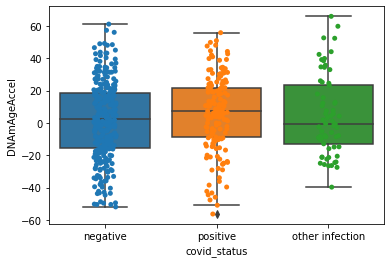

In [ ]:
sns.boxplot(x='covid_status', y='DNAmAgeAccel', data=metadata)
sns.stripplot(x='covid_status', y='DNAmAgeAccel', data=metadata)
stats.ttest_ind(metadata[metadata['covid_status'] == 'negative']['DNAmAgeAccel'], metadata[metadata['covid_status'] == 'positive']['DNAmAgeAccel'], equal_var=False)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


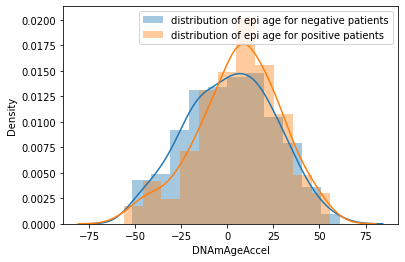

In [ ]:
sns.distplot(metadata[metadata['covid_status'] == 'negative']['DNAmAgeAccel'], label = 'distribution of epi age for negative patients')
sns.distplot(metadata[metadata['covid_status'] == 'positive']['DNAmAgeAccel'], label = 'distribution of epi age for positive patients')
plt.legend()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


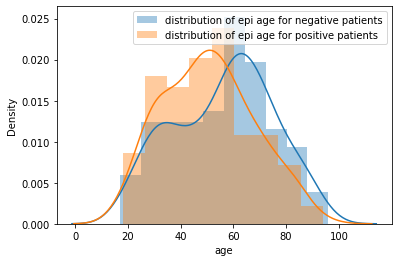

In [ ]:
sns.distplot(metadata[metadata['covid_status'] == 'negative']['age'], label = 'distribution of epi age for negative patients')
sns.distplot(metadata[metadata['covid_status'] == 'positive']['age'], label = 'distribution of epi age for positive patients')
plt.legend()

In [ ]:
datmeth = joblib.load(data_path + 'GSE167202_datMeth_cleaned.joblib') #pd.read_csv(data_path + 'GSE167202_ProcessedBetaValues.txt', sep = '\t',usecols = range(22, 547))
datmeth

ID_REF,cg00000103,cg00000109,cg00000155,cg00000158,cg00000165,cg00000221,cg00000236,cg00000289,cg00000292,cg00000321,...,cg27665715,cg27665754,cg27665767,cg27665769,cg27665823,cg27665829,cg27665913,cg27665925,cg27666049,cg27666108
204491920001_R07C01,0.943217,0.944858,0.956105,0.963407,0.188017,0.930414,0.768055,0.927669,0.870361,0.341469,...,0.984120,0.946088,0.512559,0.564343,0.817892,0.944977,0.934140,0.019254,0.795107,0.514120
204491920003_R03C01,0.953422,0.949311,0.961200,0.968705,0.228060,0.931588,0.855633,0.907013,0.891162,0.333969,...,0.982504,0.942148,0.473763,0.493028,0.799917,0.947065,0.946236,0.021217,0.778069,0.459518
204491920005_R01C01,0.929418,0.932292,0.950057,0.958217,0.201261,0.910200,0.824672,0.869659,0.829375,0.412194,...,0.979815,0.929734,0.466363,0.420912,0.867104,0.927923,0.923912,0.019268,0.793384,0.406909
204491920005_R02C01,0.938489,0.929350,0.958476,0.964399,0.171678,0.921792,0.732779,0.868617,0.853233,0.313198,...,0.979085,0.942484,0.550112,0.452176,0.887959,0.929000,0.933658,0.017283,0.822926,0.448676
204491920005_R03C01,0.921962,0.929877,0.954147,0.962074,0.214538,0.928247,0.818243,0.885551,0.853380,0.306442,...,0.983111,0.938797,0.491124,0.429107,0.859900,0.934323,0.929754,0.021671,0.866196,0.440163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204658390044_R05C01,0.943235,0.948659,0.963585,0.976325,0.175614,0.950658,0.748581,0.913482,0.855973,0.342978,...,0.980298,0.956594,0.461232,0.514835,0.888011,0.951362,0.941753,0.017981,0.824549,0.505136
204658390044_R07C01,0.948456,0.945994,0.954363,0.971542,0.152515,0.945089,0.738386,0.890063,0.854592,0.378068,...,0.980885,0.964559,0.491724,0.482357,0.901568,0.945400,0.940650,0.015348,0.901398,0.391703
204658390048_R06C01,0.929901,0.948757,0.958129,0.967145,0.135978,0.932341,0.733212,0.888482,0.817921,0.301807,...,0.983056,0.954908,0.496037,0.429346,0.943931,0.935085,0.932050,0.016745,0.854547,0.324100
204658390048_R07C01,0.951213,0.941689,0.969349,0.969575,0.211879,0.944805,0.772764,0.915471,0.809317,0.217806,...,0.985118,0.955786,0.347017,0.433107,0.908279,0.957583,0.938777,0.018571,0.856208,0.383344


## Modeling

In [ ]:

demo_df = metadata[['id','covid_status', 'Sex', 'age', 'race', 'ethnicity',
       'white_blood_cell_count', 'hemoglobin', 'hematocrit', 'platelet_count',
       'nrbc_percent', 'nrbc_absolute', 'segmented_neutrophils',
       'immature_granulocytes_percent', 'neutrophils_absolute',
       'immature_granulocytes_absolute', 'lymphocyte_percent',
       'lymphocyte_absolute', 'monocyte_percent', 'monocyte_absolute',
       'eosinophils_percent', 'eosinophils_absolute', 'basophils_percent',
       'basophils_absolute'
       ]]

demo_df = demo_df[demo_df['covid_status']!= 'other infection']
target = metadata[metadata['covid_status']!= 'other infection']['DNAmAgeAccel']
demo_df['covid_status'] = demo_df['covid_status'].replace({'positive': 1, 'negative': 0, 'other infection': -1})
demo_df = demo_df.set_index('id')

demo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 204491920001_R07C01 to 204658390048_R08C01
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   covid_status                    460 non-null    int64  
 1   Sex                             460 non-null    object 
 2   age                             460 non-null    int64  
 3   race                            444 non-null    object 
 4   ethnicity                       456 non-null    object 
 5   white_blood_cell_count          456 non-null    float64
 6   hemoglobin                      454 non-null    float64
 7   hematocrit                      456 non-null    float64
 8   platelet_count                  455 non-null    float64
 9   nrbc_percent                    445 non-null    float64
 10  nrbc_absolute                   442 non-null    float64
 11  segmented_neutrophils           360 non-null    float64
 12  immatur

In [ ]:
demo_df = pd.concat([demo_df.drop(['Sex', 'race', 'ethnicity'], axis = 1), 
                     pd.get_dummies(demo_df[['Sex', 'race', 'ethnicity']], prefix = ['Sex', 'race', 'ethnicity'])], axis = 1)

In [ ]:
demo_df

,covid_status,age,white_blood_cell_count,hemoglobin,hematocrit,platelet_count,nrbc_percent,nrbc_absolute,segmented_neutrophils,immature_granulocytes_percent,...,Sex_Female,Sex_Male,race_AmericanIndianorAlaskanNative,race_Asian,race_BlackorAA,race_NativeHawaiianorPacificIslander,race_Other,race_White,ethnicity_Hispanic or Latino,ethnicity_Not Hispanic or Latino
id,,,,,,,,,,,,,,,,,,,,,
204491920001_R07C01,0,27,13.1,12.2,36.4,210.0,0.0,0.00,NaN,NaN,...,1,0,0,0,0,0,0,1,0,1
204491920003_R03C01,0,34,3.4,13.2,40.9,179.0,0.0,0.00,64.7,0.6,...,0,1,0,0,0,0,1,0,1,0
204491920005_R01C01,1,53,6.5,13.3,41.5,247.0,0.0,0.00,64.1,0.2,...,1,0,0,0,0,0,1,0,1,0
204491920005_R02C01,1,34,5.4,14.2,43.6,188.0,0.2,0.01,73.9,0.4,...,1,0,0,0,0,0,1,0,1,0
204491920005_R03C01,0,68,4.1,13.8,42.2,232.0,0.0,0.00,56.1,0.2,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204658390044_R05C01,0,19,6.8,15.0,43.9,229.0,0.0,0.00,NaN,NaN,...,1,0,0,0,0,0,1,0,1,0
204658390044_R07C01,0,63,6.2,15.7,48.9,233.0,0.0,0.00,65.0,0.6,...,0,1,0,0,0,0,0,1,0,1
204658390048_R06C01,1,67,12.6,15.6,47.9,206.0,0.0,0.00,77.8,1.2,...,0,1,0,0,1,0,0,0,0,1


### How good is the prediction with just demographic data? 

Won't spend too much time on this, basic run of the mill XGB probably

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(demo_df, target, stratify = demo_df['covid_status'], test_size = .3) #stratify ttsplit by covid status

In [ ]:
xgbr = xgb.XGBRegressor(max_depth = 4, learning_rate = 1e-1, n_jobs = -1,objective = 'reg:squarederror', verbose = 3)

In [ ]:
xgbr.fit(X_train, y_train)

XGBRegressor(max_depth=4, n_jobs=-1, objective='reg:squarederror', verbose=3)

In [ ]:
y_preds = xgbr.predict(X_train)
y_test_preds = xgbr.predict(X_test)
print("The MSE on the training set is: ", np.mean((y_train-y_preds)**2))
print("The MSE on the testing set is:  ", np.mean((y_test-y_test_preds)**2))


print("The MAE on the training set is: ", np.mean((y_train-y_preds).abs()))
print("The MAE on the testing set is:  ", np.mean((y_test-y_test_preds).abs()))

The MSE on the training set is:  21.87051859726586
The MSE on the testing set is:   270.97483400135644
The MAE on the training set is:  3.362359156476253
The MAE on the testing set is:   13.162996018342298


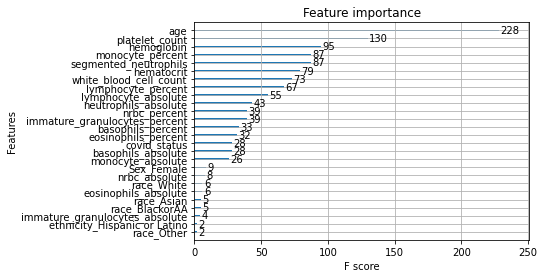

In [ ]:
xgb.plot_importance(xgbr)

In [ ]:
explainer = shap.Explainer(xgbr, X_train)
shap_values = explainer(X_train)

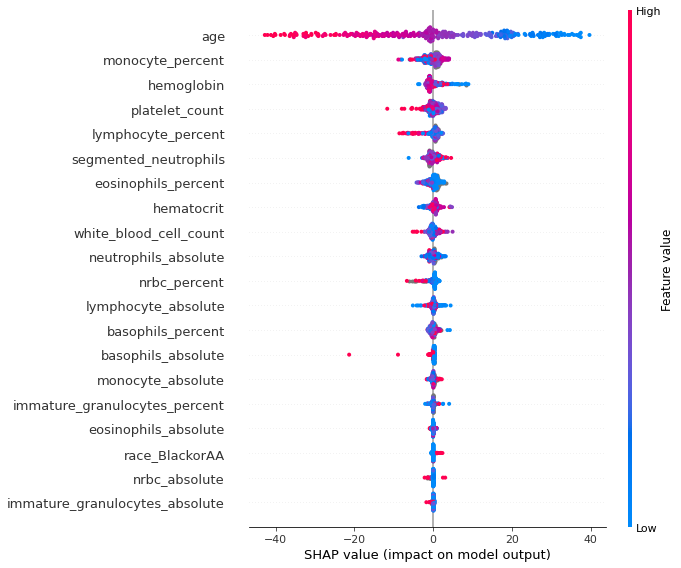

In [ ]:
shap.summary_plot(shap_values)

### Now with the actual methylation data added??

In [ ]:
def reduce_features(methdata, n_samples = 500):
  """
  Arbitrary function to reduce the number of features in the data
  """

  #Simplest approach — take the columns with the most variance. 
  
  vars = methdata.var().values
  topkfeats = np.argpartition(vars, -n_samples)[-n_samples:]
  return methdata.iloc[:,topkfeats]


In [ ]:
reduced_datmeth = reduce_features(datmeth, 10000)
reduced_datmeth = reduced_datmeth.reset_index().rename({'index':'id'},axis = 1)

In [ ]:
reduced_datmeth

ID_REF,id,cg23473396,cg15657440,cg02579620,cg13526469,cg20982011,cg07044859,cg21550016,cg05275182,cg11342941,...,cg19726630,cg22417589,cg14349378,cg19726599,cg00412554,cg19718903,cg04520169,cg01688609,cg05948955,cg05057827
0,204491920001_R07C01,0.394798,0.425951,0.386463,0.363997,0.834527,0.531482,0.876002,0.578006,0.970338,...,0.041350,0.423035,0.409794,0.931445,0.558679,0.461241,0.542840,0.919803,0.490056,0.869061
1,204491920003_R03C01,0.105909,0.134935,0.070628,0.399733,0.744581,0.542114,0.671285,0.749255,0.966303,...,0.035132,0.028471,0.169083,0.949522,0.926250,0.031482,0.395443,0.897860,0.908712,0.452275
2,204491920005_R01C01,0.361235,0.340998,0.328009,0.484196,0.739358,0.278211,0.783789,0.605961,0.964904,...,0.048073,0.370775,0.437971,0.420284,0.622850,0.482585,0.021267,0.906080,0.860826,0.899306
3,204491920005_R02C01,0.383515,0.343152,0.340510,0.293376,0.792851,0.403879,0.984247,0.590341,0.428274,...,0.041263,0.389199,0.375248,0.939132,0.653401,0.492214,0.038541,0.914459,0.927553,0.423845
4,204491920005_R03C01,0.101013,0.103980,0.089460,0.201954,0.730783,0.480326,0.531386,0.607013,0.975062,...,0.042570,0.026632,0.096948,0.957552,0.926772,0.024585,0.461849,0.276195,0.849439,0.897557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,204658390044_R05C01,0.356951,0.416921,0.370348,0.419784,0.815932,0.291630,0.805961,0.834201,0.958360,...,0.036253,0.467831,0.492390,0.376502,0.628082,0.495165,0.349078,0.920957,0.903065,0.542468
456,204658390044_R07C01,0.295585,0.252063,0.233657,0.438045,0.815608,0.253744,0.678221,0.530438,0.784201,...,0.031619,0.270369,0.276714,0.383401,0.823625,0.212124,0.229862,0.903921,0.899832,0.619462
457,204658390048_R06C01,0.104240,0.096484,0.083493,0.451008,0.767893,0.255587,0.979437,0.603360,0.973565,...,0.043020,0.020417,0.091415,0.964782,0.919079,0.019193,0.324501,0.252968,0.880072,0.506538
458,204658390048_R07C01,0.424320,0.389808,0.399636,0.383186,0.832141,0.221036,0.646449,0.506444,0.978830,...,0.034314,0.460712,0.541671,0.971985,0.576450,0.483112,0.365755,0.895294,0.937500,0.484952


In [ ]:
all_feats = pd.merge(demo_df['covid_status'], reduced_datmeth, on = 'id')
index = all_feats['id']
all_feats = all_feats.drop('id',axis = 1)
print(all_feats.shape)
all_feats.head()

(460, 10001)


,covid_status,cg23473396,cg15657440,cg02579620,cg13526469,cg20982011,cg07044859,cg21550016,cg05275182,cg11342941,...,cg19726630,cg22417589,cg14349378,cg19726599,cg00412554,cg19718903,cg04520169,cg01688609,cg05948955,cg05057827
0,0,0.394798,0.425951,0.386463,0.363997,0.834527,0.531482,0.876002,0.578006,0.970338,...,0.041350,0.423035,0.409794,0.931445,0.558679,0.461241,0.542840,0.919803,0.490056,0.869061
1,0,0.105909,0.134935,0.070628,0.399733,0.744581,0.542114,0.671285,0.749255,0.966303,...,0.035132,0.028471,0.169083,0.949522,0.926250,0.031482,0.395443,0.897860,0.908712,0.452275
2,1,0.361235,0.340998,0.328009,0.484196,0.739358,0.278211,0.783789,0.605961,0.964904,...,0.048073,0.370775,0.437971,0.420284,0.622850,0.482585,0.021267,0.906080,0.860826,0.899306
3,1,0.383515,0.343152,0.340510,0.293376,0.792851,0.403879,0.984247,0.590341,0.428274,...,0.041263,0.389199,0.375248,0.939132,0.653401,0.492214,0.038541,0.914459,0.927553,0.423845
4,0,0.101013,0.103980,0.089460,0.201954,0.730783,0.480326,0.531386,0.607013,0.975062,...,0.042570,0.026632,0.096948,0.957552,0.926772,0.024585,0.461849,0.276195,0.849439,0.897557


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_feats, target, stratify = all_feats['covid_status'], test_size = .2, random_state=7) #stratify ttsplit by covid status

### Naive no Conditioning XGB GridSearch 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
xgbmodel = xgb.XGBRegressor(tree_meth = 'gpu_hist', objective = 'reg:squarederror')

In [ ]:
params = {
    'max_depth': [3,4,5,6,8],
    'n_estimators': [50, 100, 200],
    'learning_rate': [1e-1, 1e-2, 1e-3],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 1, 2, 5],
    'reg_alpha': [0, 1, 10, 20], 
    'reg_lambda': [0, .1, .5, 1]
}

In [ ]:
rcv = RandomizedSearchCV(xgbmodel, params, n_jobs = -1, n_iter = 25, verbose = 2)
rcv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBRegressor(objective='reg:squarederror',
                                          tree_meth='gpu_hist'),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'gamma': [0, 1, 2, 5],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 4, 5, 6, 8],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'reg_alpha': [0, 1, 10, 20],
                                        'reg_lambda': [0, 0.1, 0.5, 1]},
                   verbose=2)

In [ ]:
pd.DataFrame(rcv.cv_results_).sort_values(by = 'mean_test_score', ascending = False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,15.497685,0.206109,0.192755,0.002007,0.1,10,50,1,3,0.1,0,"{'reg_lambda': 0.1, 'reg_alpha': 10, 'n_estima...",0.388531,0.301473,0.298595,0.399829,0.336077,0.344901,0.042494,1
11,31.535559,0.364880,0.195398,0.003974,0,0,50,10,8,0.1,1,"{'reg_lambda': 0, 'reg_alpha': 0, 'n_estimator...",0.385985,0.287627,0.327995,0.390770,0.329456,0.344366,0.038975,2
3,26.586011,0.408356,0.196010,0.004051,1,20,50,1,5,0.1,1,"{'reg_lambda': 1, 'reg_alpha': 20, 'n_estimato...",0.338114,0.318015,0.351079,0.336270,0.344704,0.337636,0.011115,3
10,26.205271,0.157357,0.197195,0.004755,1,20,50,1,5,0.1,0,"{'reg_lambda': 1, 'reg_alpha': 20, 'n_estimato...",0.339202,0.307328,0.351178,0.345423,0.339528,0.336532,0.015248,4
19,55.178950,0.707293,0.199308,0.010321,0,0,200,10,3,0.1,1,"{'reg_lambda': 0, 'reg_alpha': 0, 'n_estimator...",0.325722,0.267468,0.357493,0.373342,0.333686,0.331542,0.036234,5


In [ ]:
rcv.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 50,
 'reg_alpha': 10,
 'reg_lambda': 0.1}

TRAINING


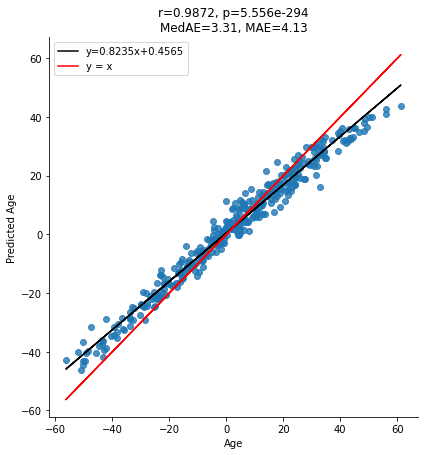

0.9872126880837949
TESTING


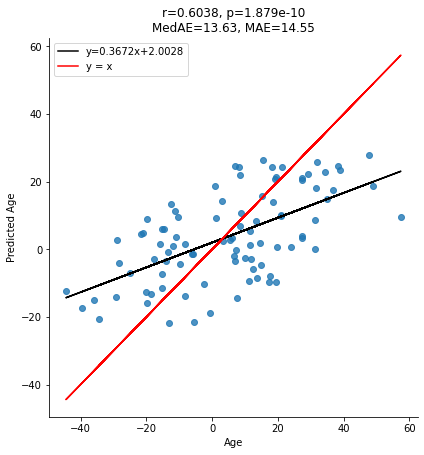

0.6037699150524821

In [ ]:
y_train_pred = rcv.best_estimator_.predict(X_train)

print("TRAINING")
print(linreg(y_train, y_train_pred, plot = True))

y_test_pred = rcv.best_estimator_.predict(X_test)

print("TESTING")
linreg(y_test, y_test_pred, plot = True)

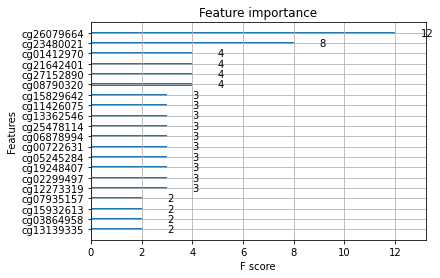

In [ ]:
xgb.plot_importance(rcv.best_estimator_, max_num_features = 20)

In [ ]:
explainer = shap.Explainer(rcv.best_estimator_, X_train)
shap_values = explainer(X_train)

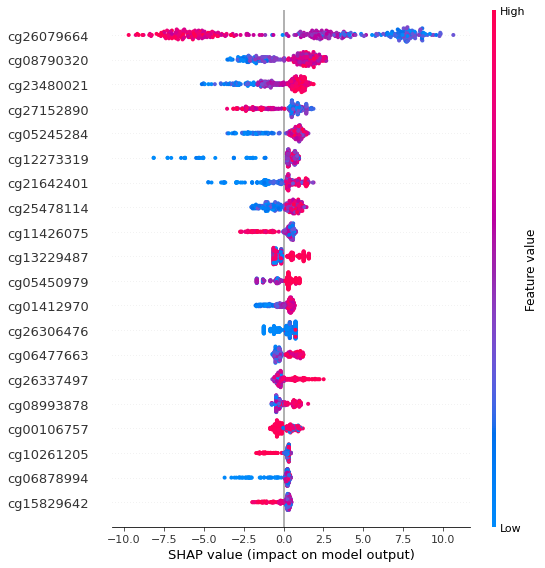

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
best_params = {'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 50,
 'reg_alpha': 10,
 'reg_lambda': 0.1}

### Causal

In [ ]:
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor
from causalml.inference.meta import BaseRRegressor
from xgboost import XGBRegressor
from causalml.dataset import synthetic_data


pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [ ]:
treatment = X_train['covid_status']
X = X_train.drop('covid_status',axis = 1).fillna(-1)
w_multi = np.array(['covid' if x==1 else 'control' for x in treatment])
y = y_train
feature_names = X.columns.values

In [ ]:
from causalml.inference.meta import *
from causalml.inference.meta import *
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
xlearner = BaseXRegressor(XGBRegressor(**best_params, tree_method = 'gpu_hist'), control_name='control')
# xlearner.estimate_ate(X, w_multi, y)
xlearner_tau = xlearner.fit_predict(X.values, w_multi, y)

model_tau_feature = RandomForestRegressor()  # specify model for model_tau_feature

xlearner.get_importance(X=X, tau=xlearner_tau, model_tau_feature=model_tau_feature,
                        normalize=True, method='auto', features=feature_names)


# Using SHAP
shap_xlearner = xlearner.get_shap_values(X=X, tau=xlearner_tau)



[20:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:33:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:33:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


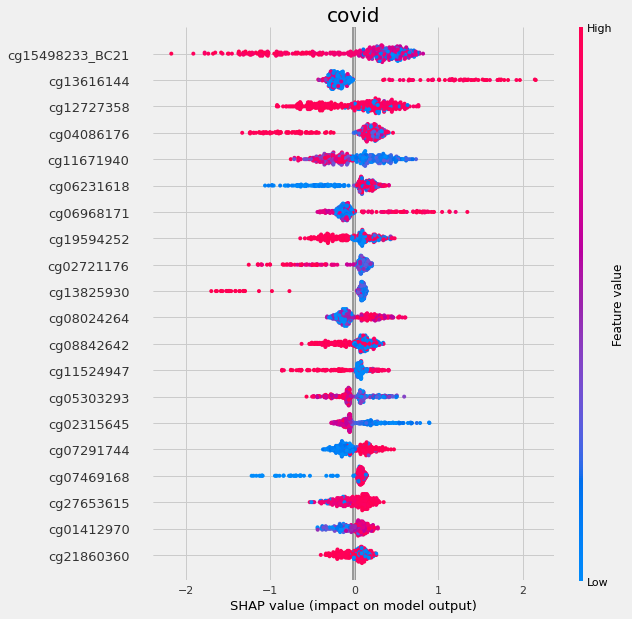

In [ ]:
xlearner.plot_shap_values(X=X, shap_dict=shap_xlearner, max_num_features = 10, features = feature_names)


In [ ]:
treatment_test = X_test['covid_status']
X_cond_test = X_test[X.columns].fillna(-1)
w_multi_test = np.array(['covid' if x==1 else 'control' for x in treatment_test])


In [ ]:
X_train.shape

(368, 10001)

All patients, using mu_t for both classes
TRAINING: ATE: 4.234283810125298


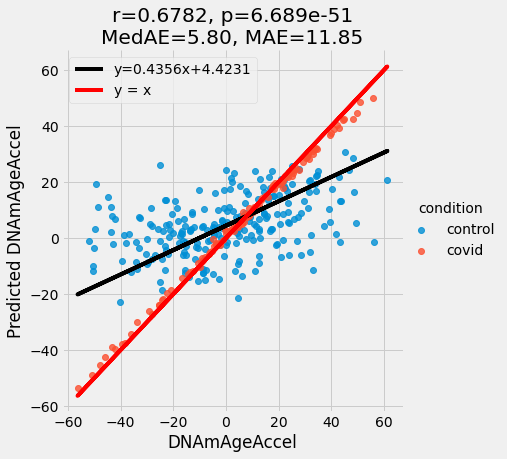

TESTING: ATE: 4.234283810125298


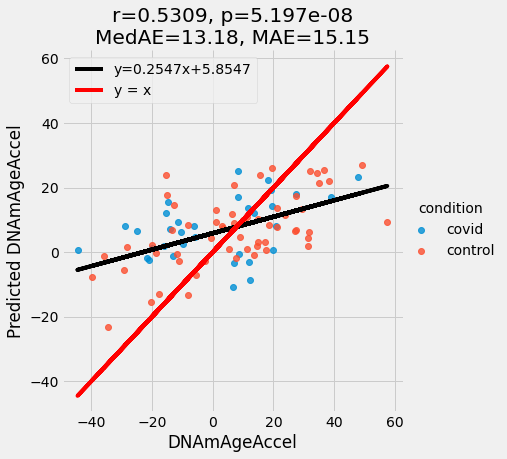

0.5309362009490313

In [ ]:

print("All patients, using mu_t for both classes")

xlearner.models_mu_t['covid'].get_booster().feature_names = list(X.columns.values)


print(f"TRAINING: ATE: {xlearner_tau.mean()}")
linreg(y_train, xlearner.models_mu_t['covid'].predict(X), color_code = w_multi, plot = True, xlabel='DNAmAgeAccel', ylabel='Predicted DNAmAgeAccel')
# plt.title("Training w/ mu_c model")


print(f"TESTING: ATE: {xlearner_tau.mean()}")
linreg(y_test, xlearner.models_mu_t['covid'].predict(X_cond_test), color_code = w_multi_test, plot = True, xlabel='DNAmAgeAccel', ylabel='Predicted DNAmAgeAccel')

Subset = COVID+ Using models_mu_t
TRAINING: ATE: 4.234283810125298


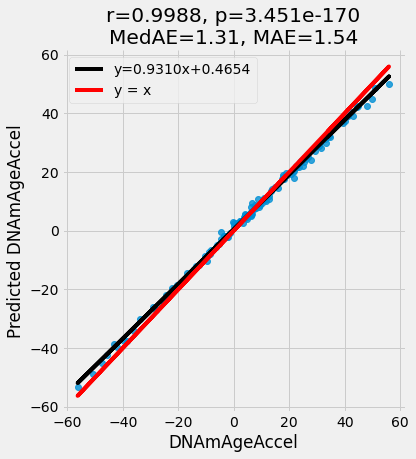

TESTING: ATE: 4.234283810125298


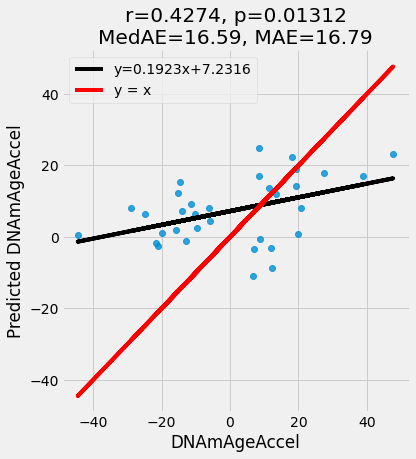

0.4273549509387573

In [ ]:
subset = (treatment == 1).values

print("Subset = COVID+ Using models_mu_t")

xlearner.models_mu_t['covid'].get_booster().feature_names = list(X.columns.values)


print(f"TRAINING: ATE: {xlearner_tau.mean()}")
linreg(y_train[subset], xlearner.models_mu_t['covid'].predict(X[subset]), plot = True, xlabel='DNAmAgeAccel', ylabel='Predicted DNAmAgeAccel')
# plt.title("Training w/ mu_c model")

test_subset = (treatment_test == 1).values

print(f"TESTING: ATE: {xlearner_tau.mean()}")
linreg(y_test[test_subset], xlearner.models_mu_t['covid'].predict(X_cond_test[test_subset]), plot = True, xlabel='DNAmAgeAccel', ylabel='Predicted DNAmAgeAccel')

Subset = COVID- Using models_mu_c
TRAINING: ATE: 4.234283810125298


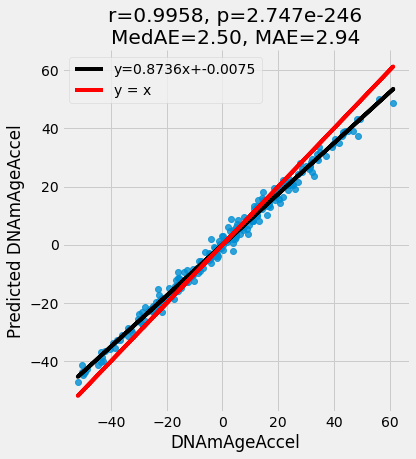

TESTING: ATE: 4.234283810125298


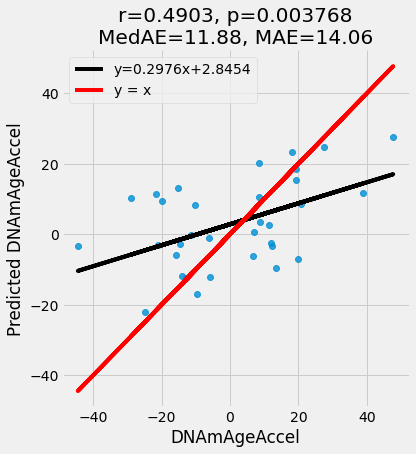

0.4903481914114471

In [ ]:
subset = (treatment == 0).values

print("Subset = COVID- Using models_mu_c")

xlearner.models_mu_c['covid'].get_booster().feature_names = list(X.columns.values)


print(f"TRAINING: ATE: {xlearner_tau.mean()}")
linreg(y_train[subset], xlearner.models_mu_c['covid'].predict(X[subset]), plot = True, xlabel='DNAmAgeAccel', ylabel='Predicted DNAmAgeAccel')
# plt.title("Training w/ mu_c model")

test_subset = (treatment_test == 1).values

print(f"TESTING: ATE: {xlearner_tau.mean()}")
linreg(y_test[test_subset], xlearner.models_mu_c['covid'].predict(X_cond_test[test_subset]), plot = True, xlabel='DNAmAgeAccel', ylabel='Predicted DNAmAgeAccel')

### DragonNet

In [ ]:
from causalml.inference.tf import DragonNet

In [ ]:
from causalml.inference.tf.utils import regression_loss
dragon = DragonNet(neurons_per_layer=100, targeted_reg=False, learning_rate = 3e-3, batch_size = 16, reg_l2 = .1)
dragon_ite = dragon.fit_predict(X.values, treatment, y_train, return_components=False)
dragon_ate = dragon_ite.mean()

Epoch 1/30
19/19 [==============================] - 2s 26ms/step - loss: 9970.6396 - regression_loss: 9801.0449 - binary_classification_loss: 19.9919 - treatment_accuracy: 0.5274 - track_epsilon: 0.1079 - val_loss: 6156.3389 - val_regression_loss: 6152.8726 - val_binary_classification_loss: 13.9238 - val_treatment_accuracy: 0.6325 - val_track_epsilon: 0.1079 - lr: 0.0030
Epoch 2/30
19/19 [==============================] - 0s 5ms/step - loss: 9783.3330 - regression_loss: 9556.1689 - binary_classification_loss: 15.9829 - treatment_accuracy: 0.6096 - track_epsilon: 0.1079 - val_loss: 6101.7954 - val_regression_loss: 6075.2651 - val_binary_classification_loss: 9.9265 - val_treatment_accuracy: 0.6325 - val_track_epsilon: 0.1079 - lr: 0.0030
Epoch 3/30
19/19 [==============================] - 0s 6ms/step - loss: 9626.3740 - regression_loss: 9499.0537 - binary_classification_loss: 10.8594 - treatment_accuracy: 0.6469 - track_epsilon: 0.1079 - val_loss: 6075.1377 - val_regression_loss: 6036.70

DRAGONNET
All patients, using mu_t for both classes
TRAINING: ATE: 2.6334612369537354


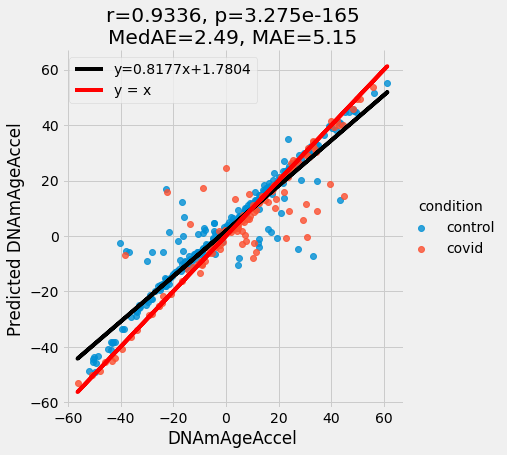

TESTING: ATE: 2.9579882621765137


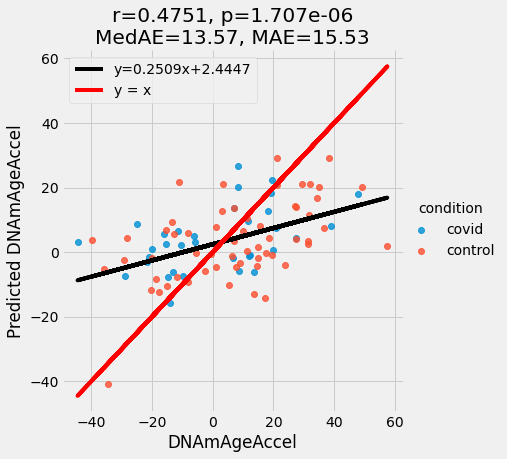

0.47509921171554736

In [ ]:
print("DRAGONNET")
print("All patients, using mu_t for both classes")


print(f"TRAINING: ATE: {dragon_ate.mean()}")
linreg(y_train, dragon.predict(X)[:, 1], color_code = w_multi, plot = True, xlabel='DNAmAgeAccel', ylabel='Predicted DNAmAgeAccel')
# plt.title("Training w/ mu_c model")


print(f"TESTING: ATE: {dragon.predict_tau(X_cond_test).mean()}")
linreg(y_test, dragon.predict(X_cond_test)[:, 1], color_code = w_multi_test, plot = True, xlabel='DNAmAgeAccel', ylabel='Predicted DNAmAgeAccel')

DRAGONNET
All patients, using mu_t for both classes
TRAINING: ATE: 3.5286919037160875


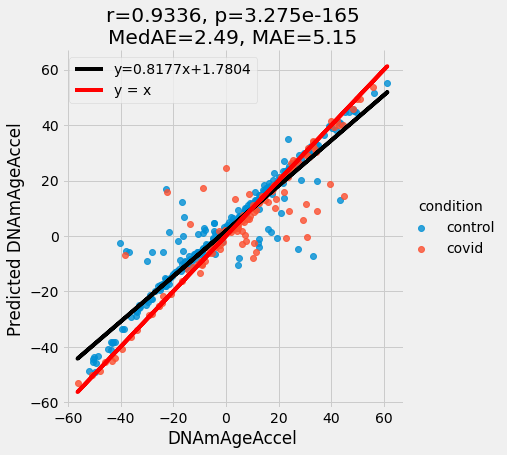

TESTING: ATE: 3.5286919037160875


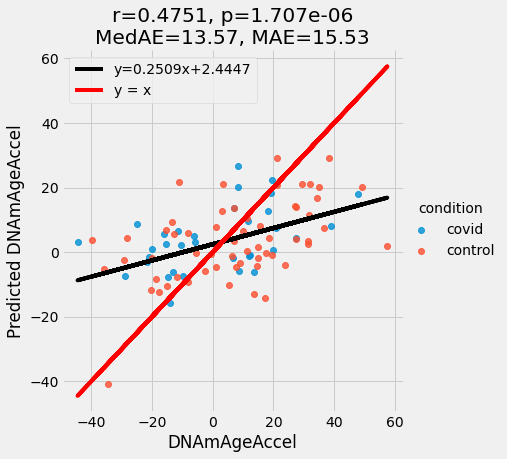

0.47509921171554736

In [ ]:
print("DRAGONNET")
print("All patients, using mu_t for both classes")


print(f"TRAINING: ATE: {xlearner_tau.mean()}")
linreg(y_train, dragon.predict(X)[:, 1], color_code = w_multi, plot = True, xlabel='DNAmAgeAccel', ylabel='Predicted DNAmAgeAccel')
# plt.title("Training w/ mu_c model")


print(f"TESTING: ATE: {xlearner_tau.mean()}")
linreg(y_test, dragon.predict(X_cond_test)[:, 1], color_code = w_multi_test, plot = True, xlabel='DNAmAgeAccel', ylabel='Predicted DNAmAgeAccel')

In [ ]:
import tensorflow as tf 
from tensorflow import keras

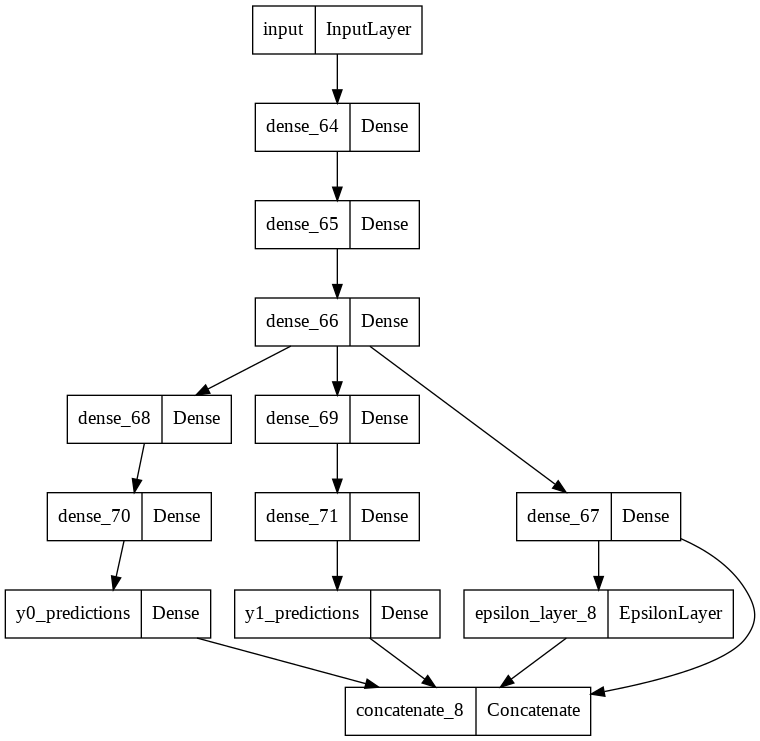

In [ ]:
tf.keras.utils.plot_model(dragon.dragonnet)